We have implemented the control variates variance reduction method in the file `controlvariates.py`. In this notebook, we illustrate it on the calculation of an integral using Monte-Carlo integration. You may want to have a look at the implementation first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from controlvariates import controlvariates

We use Monte-Carlo integration to calculate the following integral: $$\int_0^1 e^x dx.$$ It's value is equal to 

In [2]:
true_value = np.e - 1
true_value

1.718281828459045

We calculate it once with independent draws, and once with controlvariates

In [3]:
R = 100000

In [4]:
uniform_draws = np.random.uniform(size=R)
exp_draws = np.exp(uniform_draws)

We approximate the integral using both types of draws for increasing values of R, in order to illustrate the lower variance associated with the control variates estimate.

In [5]:
first = 100
all_r = range(first, R)
integral_independent = np.array([np.mean(exp_draws[:r]) for r in all_r])
integral_control = np.array(
    [
        controlvariates(exp_draws[:r], uniform_draws[:r], 0.5)
        for r in tqdm(all_r)
    ]
)

100%|██████████| 99900/99900 [00:44<00:00, 2225.94it/s]


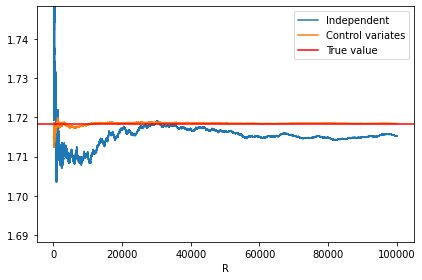

In [6]:
yrange = 0.03
plt.ylim([true_value - yrange, true_value + yrange])
plt.plot(all_r, integral_independent, label='Independent')
plt.plot(all_r, integral_control, label='Control variates')
plt.axhline(y=true_value, color='r', linestyle='-', label='True value')
plt.legend()
plt.xlabel('R')
plt.tight_layout()
plt.show()

We do the same for the following integral: $$\int_0^1 \left(x-\frac{1}{2}\right)^2 dx.$$
Contrarily to the antithetic draws, the control variates cannot increase the variance. In this case, it does not improve it, though, and the results from the control variates are almost identical to the results from the independent draws, as illustrated below.

In [7]:
true_value = 1 / 12
true_value

0.08333333333333333

In [8]:
uniform_draws = np.random.uniform(size=R)
integrand_draws = (uniform_draws - 0.5)**2

In [9]:
first = 100
all_r = range(first, R)
integral_independent = np.array([np.mean(integrand_draws[:r]) for r in all_r])
integral_control = np.array(
    [
        controlvariates(integrand_draws[:r], uniform_draws[:r], 0.5)
        for r in tqdm(all_r)
    ]
)


100%|██████████| 99900/99900 [00:43<00:00, 2311.88it/s]


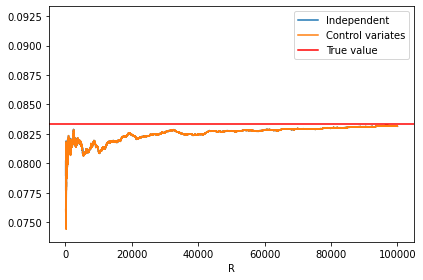

In [16]:
yrange = 0.01
plt.ylim([true_value - yrange, true_value + yrange])
plt.plot(all_r, integral_independent, label='Independent')
plt.plot(all_r, integral_control, label='Control variates')
plt.axhline(y=true_value, color='r', linestyle='-', label='True value')
plt.legend()
plt.xlabel('R')
plt.tight_layout()
plt.show()

In [11]:
integral_independent

array([0.07899959, 0.0798646 , 0.07963939, ..., 0.08316158, 0.08316086,
       0.08316049])

In [12]:
integral_control

array([0.07607866, 0.07655924, 0.07653578, ..., 0.0831616 , 0.08316087,
       0.08316051])